In [ ]:
import pandas as pd
df = pd.read_csv(r"/kaggle/input/crsp-with-mkt-ret-68-24/crsp_data_dump_daily.csv", parse_dates=["date"])



In [ ]:
df.columns = df.columns.str.lower()
df_filtered = df[df['exchcd'].isin([1, 2, 3]) & df['shrcd'].isin([10, 11])]


In [ ]:
import gc
gc.collect()

In [ ]:
import pandas as pd

# Ensure ret and vwretd are numeric (invalid strings converted to NaN)
df_filtered['ret'] = pd.to_numeric(df_filtered['ret'], errors='coerce')
df_filtered['vwretd'] = pd.to_numeric(df_filtered['vwretd'], errors='coerce')

# Drop rows where either is missing (NaN)
df_filtered = df_filtered.dropna(subset=['ret', 'vwretd'])

# Extract year and month from date
df_filtered['year'] = df_filtered['date'].dt.year
df_filtered['month'] = df_filtered['date'].dt.month

# Reset index
df_filtered = df_filtered.reset_index(drop=True)


In [ ]:
df_filtered

In [ ]:
df_filtered.to_parquet("crsp_1968_2024_daily_cleaned.parquet", index=False)

In [ ]:
import pandas as pd
df_filtered= pd.read_parquet(r"/kaggle/input/daily-crsp-df/crsp_1968_2024_daily_cleaned.parquet")
#change path to /kaggle/input/daily-crsp-df/crsp_1968_2024_daily_cleaned.parquet

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Prepare data and compute log returns
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['log_ret'] = np.log1p(df_filtered['ret'])
df_filtered['log_mkt_ret'] = np.log1p(df_filtered['vwretd'])

In [ ]:
df_filtered = df_filtered.sort_values(['permno', 'date'])
df_filtered['log_ret_3d'] = df_filtered.groupby('permno')['log_ret'].transform(
    lambda x: x + x.shift(-1) + x.shift(-2)
)
df_filtered['log_mkt_ret_3d'] = df_filtered.groupby('permno')['log_mkt_ret'].transform(
    lambda x: x + x.shift(-1) + x.shift(-2)
)

In [ ]:
df_filtered.columns

In [ ]:
# Select and save without copying
df_filtered[['date', 'ret', 'permno','exchcd', 'log_ret', 'log_mkt_ret', 'log_ret_3d', 'log_mkt_ret_3d']] \
    .to_parquet("crsp_daily_log_returns_features.parquet", index=False)


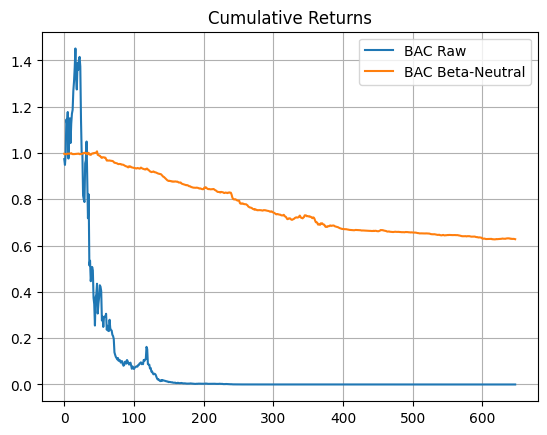

In [35]:
# Plot cumulative return of raw BAC and beta-neutral BAC
((1 + bac_factor['bac_return']).cumprod()).plot(label='BAC Raw')
((1 + bac_beta_neutral['bac_beta_neutral']).cumprod()).plot(label='BAC Beta-Neutral')
plt.legend(); plt.title("Cumulative Returns"); plt.grid(True)
